# Handwritten Digit Recognition with CNN | Deep Learning

__Description : Recognition of Handwritten digits using Convolutional Neural Network - _a Deep Learning approach___

__Python libraries used :__
    1. Tensorflow
    2. Keras
    3. Numpy
    4. Matplotlib

Import tensorflow, keras, numpy and matplotlib

In [3]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

#check the version of tensorflow
tf.__version__

'2.0.0'

Load MNIST dataset from keras.datasets

In [4]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


## Data Analysis

Let us inspect the shape and length of our train and test dataset.

In [5]:
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images,axis = 1)
train_images.shape

(60000, 28, 28)

In [6]:
print("Training Data Shape : {}".format(train_images.shape))
print("\nTraining Labels Shape : {}".format(train_labels.shape))
print("\nTesting Data Shape : {}".format(test_images.shape))
print("\nTesting Labels Shape : {}".format(test_labels.shape))

Training Data Shape : (60000, 28, 28)

Training Labels Shape : (60000,)

Testing Data Shape : (10000, 28, 28)

Testing Labels Shape : (10000,)


MNIST dataset is set of 70,000 images of handwitten digits. 60,000 training images and 10,000 test images with their corresponding labels.
All digits are labelled as their values.

### Analizing a sample image and its pixels

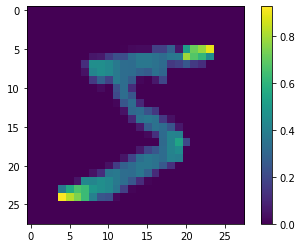

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

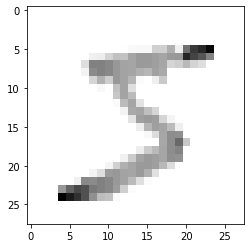

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [9]:
train_images[0].shape

(28, 28)

Each image in this 70,000 images dataset has 784 features with 28 x 28 pixels. Each pixel represents pixel intensity with value from 0 to 255.

### Visualizing first 20 Images from the Dataset with their labels

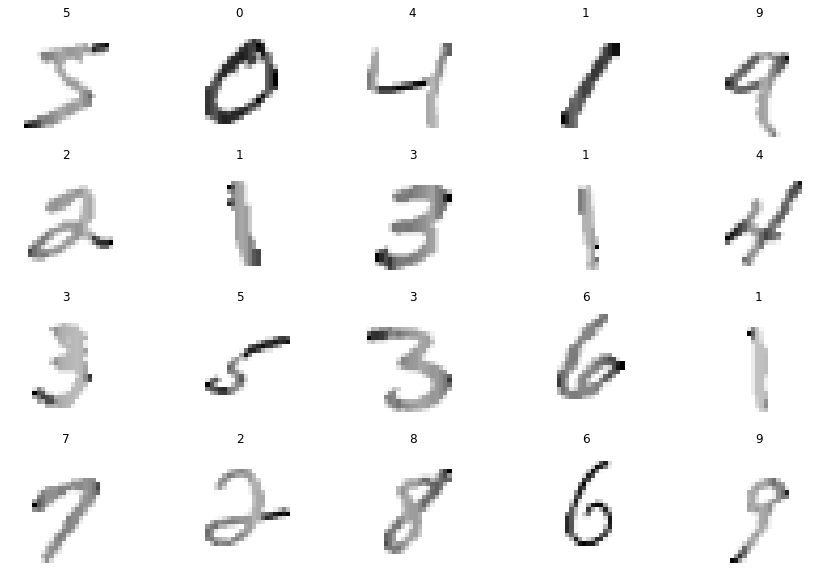

In [10]:
plt.figure(figsize = (15, 10))
for i in range(0, 20):
    plt.subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(train_images[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title(train_labels[i])

We can vaguely recognize the digits with there labels.

### Preparing data for training

In [12]:
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images,axis = 1)
train_images.shape

(60000, 28, 28)

## Convolutional Neural Network

### Building the model

In [14]:
#Creating Sequential model of Keras
cnn_model = tf.keras.models.Sequential()

# First we will convert input image to flat image of vector 28 x 28 = 784
cnn_model.add(tf.keras.layers.Flatten())

#Convolutional layer with input layer of neural network
cnn_model.add(tf.keras.layers.Dense(754,activation=tf.nn.relu))

#Convolutional layer with first hidden layer of neural network
cnn_model.add(tf.keras.layers.Dense(600,activation=tf.nn.relu))

#Convolutional layer with second hidden layer of neural network
cnn_model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))

#Convolutional layer with output layer of neural network
cnn_model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # output layer softmax for probability distribution

### Compiling the Model

In [16]:
#Compiling the model with categorical crossentropy since we have multiple classes (10)
cnn_model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )

### Training the Model

In [17]:
# Fitting the training data into CNN Model
hist = cnn_model.fit(train_images,train_labels,epochs = 2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 32s 529us/sample - loss: 0.2079 - accuracy: 0.9370
Epoch 2/2
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0879 - accuracy: 0.9733


In [25]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


### Prediction on Test Images

Predicting the values of all test images and inspecting if prediction is correct

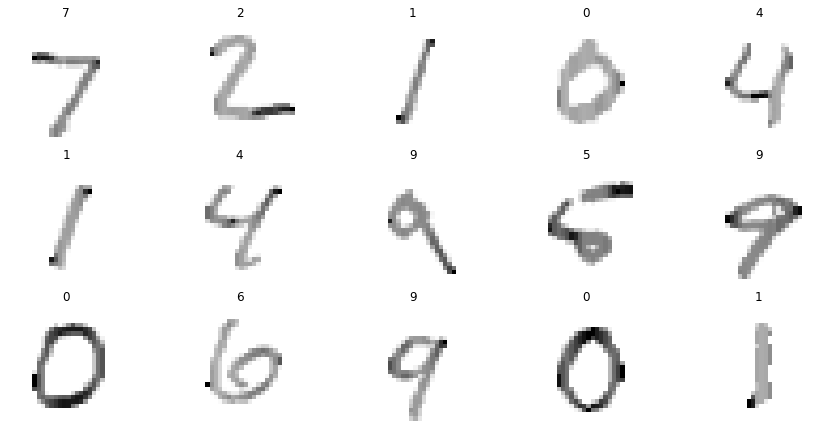

In [19]:
y_pred = cnn_model.predict(test_images)

plt.figure(figsize = (15, 10))
for i in range(0, 15):
    plt.subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(test_images[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title(np.argmax(y_pred[i]))

Checking the probability distribution for any random image in multi-class classification

In [36]:
import random
test_index = random.randint(0, 9999)

print("Probability distribution for a multi-class classification of index : ", test_index)
y_pred[test_index]

Probability distribution for a multi-class classification of index :  9029


array([2.3454964e-05, 7.2780034e-07, 3.1290903e-05, 7.2500029e-07,
       3.6076817e-04, 2.0086937e-04, 9.9924183e-01, 2.4086387e-07,
       1.3989081e-04, 2.4093325e-07], dtype=float32)

In [39]:
# Finding the value corresponding to the test_index by finding maximum probability out of 10 classes
print('The predicted value is : ', np.argmax(y_pred[test_index]))

The predicted value is :  6


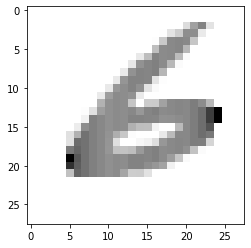

In [40]:
#Checking if the predicted value is correct
plt.imshow(test_images[test_index], cmap = plt.cm.binary)
plt.show()

CNN Model is predicting the value correctly with random images.

### Calculating CNN Model Accuracy

In [42]:
# Calculating Accuracy on test_images and test_labels
val_loss, val_acc = cnn_model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [43]:
print('loss : ',val_loss * 100) 
print('Accuracy : ',val_acc * 100)

loss :  10.6288913487643
Accuracy :  96.84000015258789


## Predicting Random Image values with three SVM models

Define a function to display digit image along with its predicted value

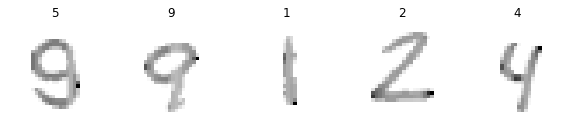

In [31]:

# Function to generate randome index values of specified length
def get_index_list(start, end, num): 
    index_list = [] 
    for i in range(num): 
        index_list.append(random.randint(start, end))   
    return index_list
  
# Displaying image and its predicted value
image_index = get_index_list(0, 300, 5)
plt.figure(figsize = (10, 10))
for i in range(len(image_index)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[image_index[i]], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.axis('off')
    plt.title(np.argmax(y_pred[image_index[i]]))


Convolutonal Neural Network recognized Handwritten digit with accuracy of 96.84 %.

Project can be further implemented to recognize live digit images with webcam.